<a href="https://colab.research.google.com/github/codingtoby/coding_toby/blob/main/UWS_Coffee_Shop_Prescriptive_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [52]:
from google.colab import files
import pandas as pd

# Upload the xlsx file#the file is named 'Copy of Coffee Shop Sales.xlsx'
uploaded = files.upload() # call files.upload() before trying to read the file

# Now you can read the uploaded file into a pandas DataFrame
df = pd.read_excel('Coffee Shop Sales.xlsx') # Changed pd.read_ to pd.read_excel


# Display DataFrame
print(df)

Saving Coffee Shop Sales.xlsx to Coffee Shop Sales (2).xlsx
        transaction_id transaction_date    month day_of_week transaction_time  \
0                    1       2023-01-01  January      Sunday         07:06:11   
1                    2       2023-01-01  January      Sunday         07:08:56   
2                    3       2023-01-01  January      Sunday         07:14:04   
3                    4       2023-01-01  January      Sunday         07:20:24   
4                    5       2023-01-01  January      Sunday         07:22:41   
...                ...              ...      ...         ...              ...   
149111          149452       2023-06-30     June      Friday         20:18:41   
149112          149453       2023-06-30     June      Friday         20:25:10   
149113          149454       2023-06-30     June      Friday         20:31:34   
149114          149455       2023-06-30     June      Friday         20:57:19   
149115          149456       2023-06-30     June 

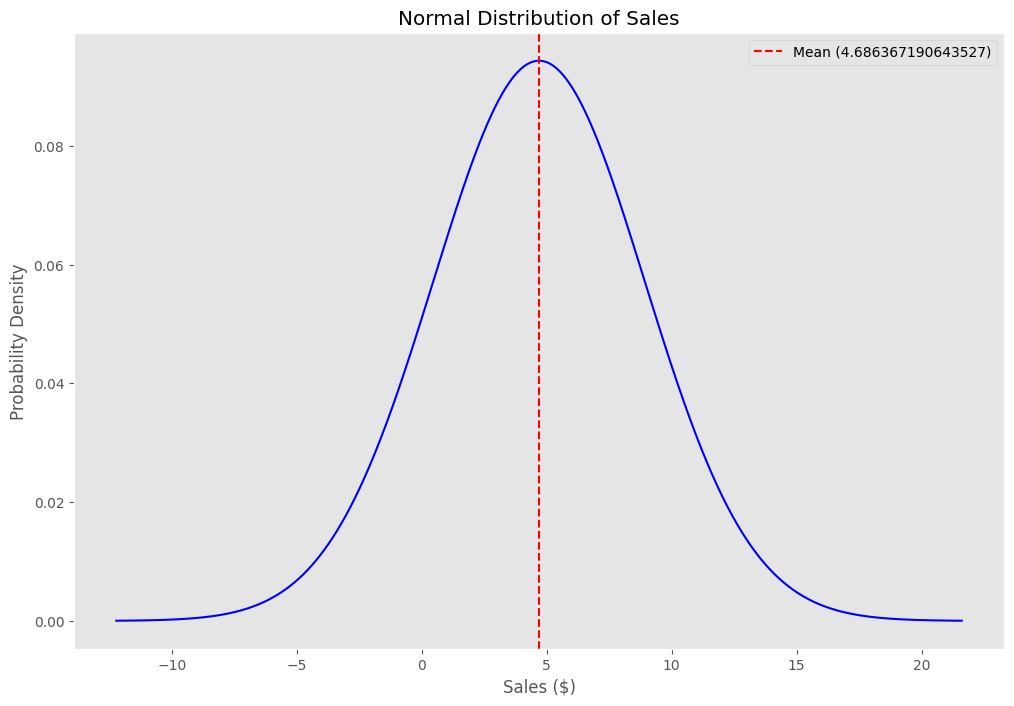

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # Import norm for pdf calculation

# Define mu and sigma (replace with your desired values)
mu = round(4.686367190643527, 2)  # for mean, rounded to 2 decimal places
sigma = round(4.227099064469352, 2) # value for standard deviation, rounded to 2 decimal places

# Create an array of values from the mean-4*std to mean+4*std
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = norm.pdf(x_values, mu, sigma)

# ... (rest of your plotting code)

plt.plot(x_values, y_values, color='blue')
plt.title('Normal Distribution of Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Probability Density')
plt.grid()
plt.axvline(x=mu, color='red', linestyle='--', label='Mean (4.686367190643527)')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
Probability of exactly 144117 successful transactions: 0.00000
Probability of exactly 144118 successful transactions: 0.00000
Probability of exactly 144119 successful transactions: 0.00000
Probability of exactly 144120 successful transactions: 0.00000
Probability of exactly 144121 successful transactions: 0.00000
Probability of exactly 144122 successful transactions: 0.00000
Probability of exactly 144123 successful transactions: 0.00000
Probability of exactly 144124 successful transactions: 0.00000
Probability of exactly 144125 successful transactions: 0.00000
Probability of exactly 144126 successful transactions: 0.00000
Probability of exactly 144127 successful transactions: 0.00000
Probability of exactly 144128 successful transactions: 0.00000
Probability of exactly 144129 successful transactions: 0.00000
Probability of exactly 144130 successful transactions: 0.00000
Probability of exactly 144131 successful transactions: 0.00000
Prob

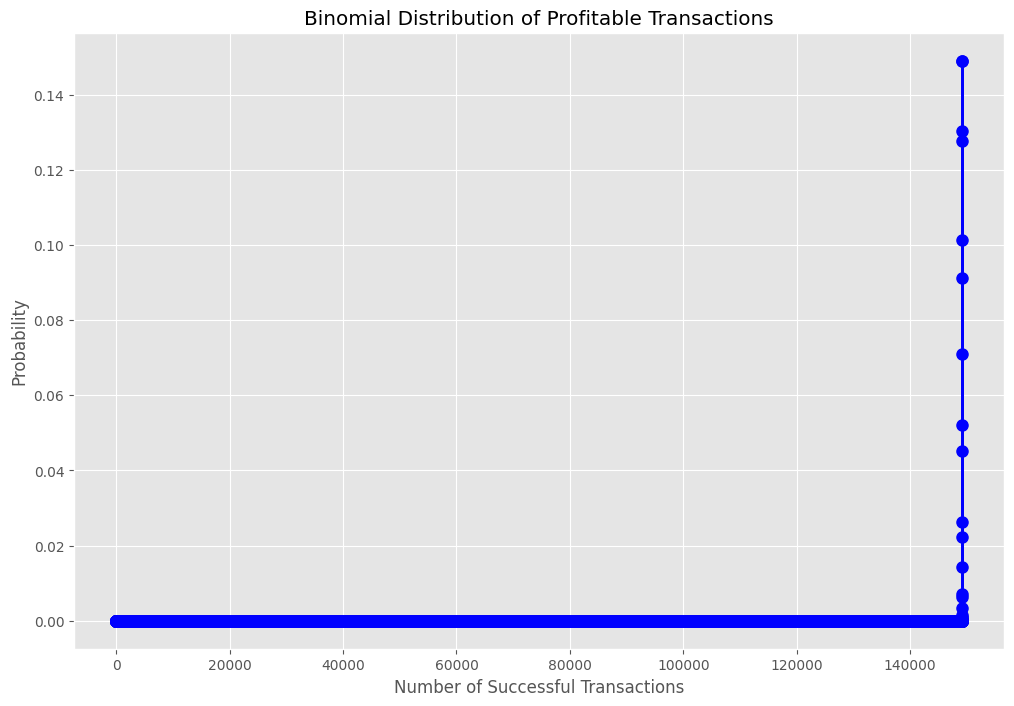

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom  # Import binom for pmf calculation

df['success'] = df['profit'] > 0

# Calculate total transactions (n) and probability of success (p)
n = len(df)  # Total number of transactions
p = df['success'].mean()  # Probability of success (profitable transactions)

# Use binomial distribution to model the data
# We calculate the probability of having k successful transactions out of n
k_values = np.arange(0, n+1)
binomial_probabilities = binom.pmf(k_values, n, p)

# Display results
for k, prob in zip(k_values, binomial_probabilities):
    print(f"Probability of exactly {k} successful transactions: {prob:.5f}")

# Optional: Plot the binomial distribution
import matplotlib.pyplot as plt
plt.plot(k_values, binomial_probabilities, 'bo', ms=8, label='binom pmf')
plt.vlines(k_values, 0, binomial_probabilities, colors='b', lw=2)
plt.title('Binomial Distribution of Profitable Transactions')
plt.xlabel('Number of Successful Transactions')
plt.ylabel('Probability')
plt.show()

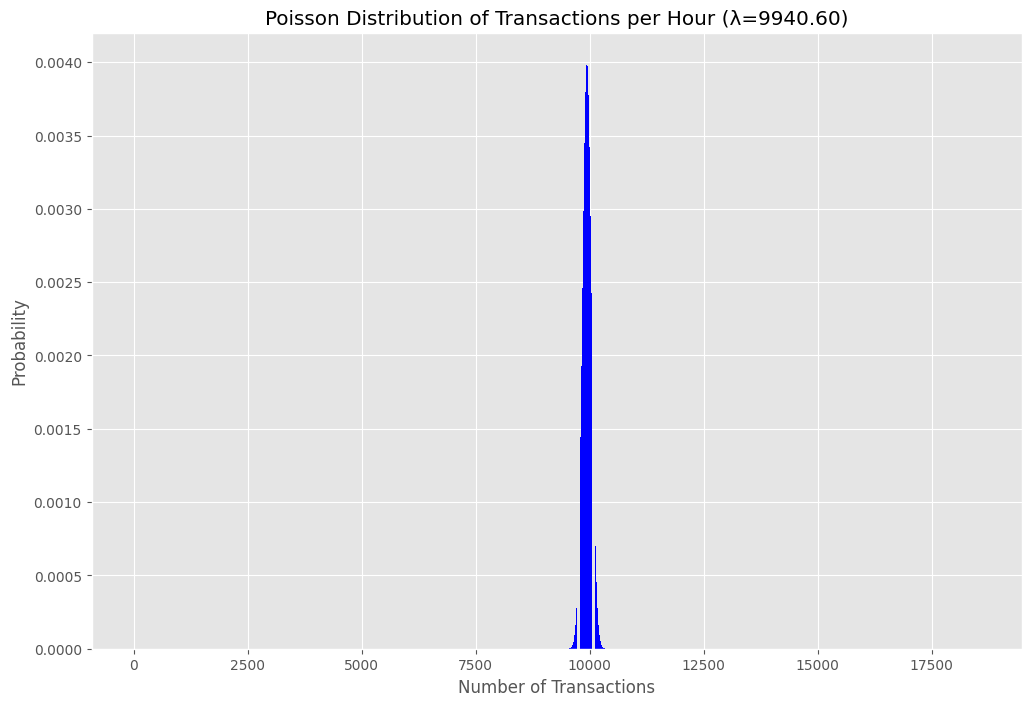

Probability of exactly 10 transactions in an hour: 0.00000
Cumulative probability of 10 or fewer transactions in an hour: 0.00000


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# We will simulate the data for successful transactions per hour (profit > 0)
# Assuming you have columns like 'transaction_id', 'profit', 'transaction_hour'

# Filter successful transactions (e.g., profit > 0)
successful_transactions = df[df['profit'] > 0]

# Group by transaction hour and count the number of transactions per hour
transactions_per_hour = successful_transactions.groupby('transaction_hour')['transaction_id'].count()

# Calculate the average number of successful transactions per hour (λ)
lambda_rate = transactions_per_hour.mean()

# Define the number of events (k) as a range of possible transaction counts in an hour
k = np.arange(0, max(transactions_per_hour) + 5)

# Calculate the Poisson probabilities for each value of k
poisson_probs = poisson.pmf(k, lambda_rate)

# Plot the Poisson distribution
plt.bar(k, poisson_probs, color='blue')
plt.title(f'Poisson Distribution of Transactions per Hour (λ={lambda_rate:.2f})')
plt.xlabel('Number of Transactions')
plt.ylabel('Probability')
plt.show()

# Example: Predict the probability of exactly 10 transactions in an hour
prob_10_transactions = poisson.pmf(10, lambda_rate)
print(f"Probability of exactly 10 transactions in an hour: {prob_10_transactions:.5f}")

# Example: Cumulative probability of 10 or fewer transactions in an hour
cum_prob_10_or_less = poisson.cdf(10, lambda_rate)
print(f"Cumulative probability of 10 or fewer transactions in an hour: {cum_prob_10_or_less:.5f}")

In [8]:
import pandas as pd

# Calculate total profit
total_profit = df['profit'].sum()

# Calculate the number of transactions
num_transactions = df['transaction_id'].count()

# Calculate the expected value of profit per transaction
expected_value_profit = total_profit / num_transactions if num_transactions > 0 else 0

print(f"Expected Value of Profit per Transaction: ${expected_value_profit:.2f}")

Expected Value of Profit per Transaction: $2.94


In [9]:
# Calculate total sales
total_sales = df['sales'].sum()

# Calculate expected value of sales per transaction
expected_value_sales = total_sales / num_transactions if num_transactions > 0 else 0

print(f"Expected Value of Sales per Transaction: ${expected_value_sales:.2f}")

Expected Value of Sales per Transaction: $4.69


In [10]:
# Calculate total quantity sold
total_quantity = df['transaction_qty'].sum()

# Calculate expected value of quantity per transaction
expected_value_qty = total_quantity / num_transactions if num_transactions > 0 else 0

print(f"Expected Value of Quantity Sold per Transaction: {expected_value_qty:.2f}")

Expected Value of Quantity Sold per Transaction: 1.44


In [12]:
import pandas as pd

# Calculate variance and standard deviation for Profit
profit_variance = df['profit'].var()  # Sample variance
profit_std_dev = df['profit'].std()   # Sample standard deviation

# Calculate variance and standard deviation for Sales
sales_variance = df['sales'].var()  # Sample variance
sales_std_dev = df['sales'].std()   # Sample standard deviation

# Calculate variance and standard deviation for Transaction Quantity
qty_variance = df['transaction_qty'].var()  # Sample variance
qty_std_dev = df['transaction_qty'].std()   # Sample standard deviation

# Output the results
print(f"Profit - Variance: {profit_variance:.2f}, Standard Deviation: {profit_std_dev:.2f}")
print(f"Sales - Variance: {sales_variance:.2f}, Standard Deviation: {sales_std_dev:.2f}")
print(f"Transaction Quantity - Variance: {qty_variance:.2f}, Standard Deviation: {qty_std_dev:.2f}")

Profit - Variance: 3.50, Standard Deviation: 1.87
Sales - Variance: 17.87, Standard Deviation: 4.23
Transaction Quantity - Variance: 0.29, Standard Deviation: 0.54


In [61]:
import pandas as pd
from scipy.stats import spearmanr

# Convert 'transaction_date' to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Select numerical columns for correlation analysis
numerical_columns = [
    'transaction_qty',
    'wholesale_price',
    'unit_price',
    'sales',
    'profit',
    'profit_margin'
]

# Calculate Pearson correlation
pearson_corr = df[numerical_columns].corr(method='pearson')

# Calculate Spearman correlation
spearman_corr = df[numerical_columns].corr(method='spearman')

# Display the results
print("Pearson Correlation Matrix:")
print(pearson_corr)
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Optional: Calculate Spearman correlation coefficients and p-values for more insights
spearman_coeffs = []
p_values = []

for col in numerical_columns:
    coeff, p_value = spearmanr(df[col], df['sales'])  # Correlating each with 'sales'
    spearman_coeffs.append(coeff)
    p_values.append(p_value)

# Create a summary DataFrame for Spearman results
spearman_summary = pd.DataFrame({
    'Feature': numerical_columns,
    'Spearman Coefficient': spearman_coeffs,
    'P-Value': p_values
})

print("\nSpearman Correlation Summary:")
print(spearman_summary)

Pearson Correlation Matrix:
                 transaction_qty  wholesale_price  unit_price     sales  \
transaction_qty         1.000000        -0.171701   -0.123546  0.356231   
wholesale_price        -0.171701         1.000000    0.917522  0.607940   
unit_price             -0.123546         0.917522    1.000000  0.685550   
sales                   0.356231         0.607940    0.685550  1.000000   
profit                  0.651678         0.042305    0.327739  0.664429   
profit_margin           0.261382        -0.616259   -0.390253 -0.195106   

                   profit  profit_margin  
transaction_qty  0.651678       0.261382  
wholesale_price  0.042305      -0.616259  
unit_price       0.327739      -0.390253  
sales            0.664429      -0.195106  
profit           1.000000       0.367959  
profit_margin    0.367959       1.000000  

Spearman Correlation Matrix:
                 transaction_qty  wholesale_price  unit_price     sales  \
transaction_qty         1.000000        

In [20]:
import pandas as pd
import random
from scipy import stats

# Create 'pricing_strategy' column with random values
df['pricing_strategy'] = [random.choice(['discount', 'regular']) for _ in range(len(df))]

# **Here, we'll assume a fixed cost percentage of 70% of sales:**
df['cost'] = df['sales'] * 0.7  # Placeholder cost calculation

# Now we can calculate profit_margin:
df['profit_margin'] = (df['sales'] - df['cost']) / df['sales']

# Comparing profit margins between two pricing strategies (if column exists)
# Filter data based on pricing strategy
discounted = df[df['pricing_strategy'] == 'discount']['profit_margin']
regular = df[df['pricing_strategy'] == 'regular']['profit_margin']

# Conduct a T-test
t_statistic, p_value = stats.ttest_ind(discounted, regular)

# Print results
alpha = 0.05
print(f"T-Statistic: {t_statistic:.4f}, P-Value: {p_value:.4f}")

# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in profit margins.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profit margins.")

T-Statistic: -167.4510, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in profit margins.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


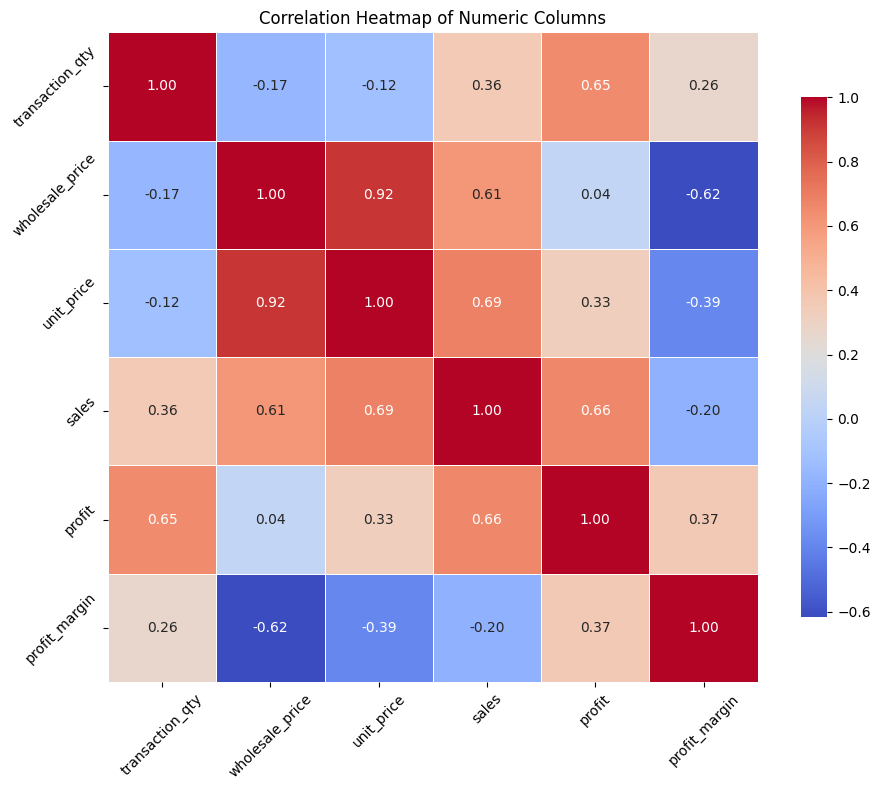

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify to load your dataset

# Example: Assuming df is already defined and contains the required columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[['transaction_qty', 'wholesale_price', 'unit_price',
                         'sales', 'profit', 'profit_margin']].corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)

# Title and labels
plt.title('Correlation Heatmap of Numeric Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the labels

# Show the heatmap
plt.show()

In [19]:
import pandas as pd
from scipy import stats

# Filter data for the three store locations
astoria = df[df['store_location'] == 'Astoria']['profit']
hells_kitchen = df[df['store_location'] == "Hell's Kitchen"]['profit']
lower_manhattan = df[df['store_location'] == 'Lower Manhattan']['profit']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(astoria, hells_kitchen, lower_manhattan)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average profit between the store locations.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average profit between the store locations.")

F-statistic: 118.56689979459837
P-value: 3.531431937826478e-52
Reject the null hypothesis. There is a significant difference in average profit between the store locations.


In [6]:
import pandas as pd
import numpy as np
from scipy import stats

# Select the profit column
profits = df['profit']

# Calculate the mean and standard error
mean_profit = np.mean(profits)
std_dev_profit = np.std(profits, ddof=1)  # Sample standard deviation
n = len(profits)  # Number of transactions
standard_error = std_dev_profit / np.sqrt(n)

# Determine the critical value for 95% confidence interval
confidence_level = 0.95
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)  # t-distribution critical value

# Calculate the confidence interval
margin_of_error = critical_value * standard_error
confidence_interval = (mean_profit - margin_of_error, mean_profit + margin_of_error)

print(f"Mean Profit: {mean_profit:.2f}")
print(f"Standard Error: {standard_error:.2f}")
print(f"Critical Value (t): {critical_value:.2f}")
print(f"Confidence Interval for Profit at {confidence_level*100}% confidence: {confidence_interval}")

Mean Profit: 2.94
Standard Error: 0.00
Critical Value (t): 1.96
Confidence Interval for Profit at 95.0% confidence: (2.9285978206000842, 2.947592930224776)


In [13]:
# Profit_margin column dividing profit by sales

# Calculate profit_margin:
df['profit_margin'] = df['profit'] / df['sales']


In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Filter for coffee product category
coffee_data = df[df['product_category'] == 'Coffee']

# Calculate sample statistics
mean_margin = coffee_data['profit_margin'].mean()
std_margin = coffee_data['profit_margin'].std()
n = len(coffee_data)

# Define prior parameters (example values)
mu_prior = 0.25
sigma_prior = 0.1

# Calculate posterior parameters
sigma_squared_data = std_margin ** 2
sigma_squared_prior = sigma_prior ** 2

mu_posterior = (mu_prior / sigma_squared_prior + n * mean_margin / sigma_squared_data) / \
                (1 / sigma_squared_prior + n / sigma_squared_data)

sigma_squared_posterior = 1 / (1 / sigma_squared_prior + n / sigma_squared_data)
std_posterior = np.sqrt(sigma_squared_posterior)

# Print results
print(f'Posterior Mean Profit Margin: {mu_posterior}')
print(f'Posterior Standard Deviation: {std_posterior}')

Posterior Mean Profit Margin: 0.7988994312260327
Posterior Standard Deviation: 3.992544038156563e-05


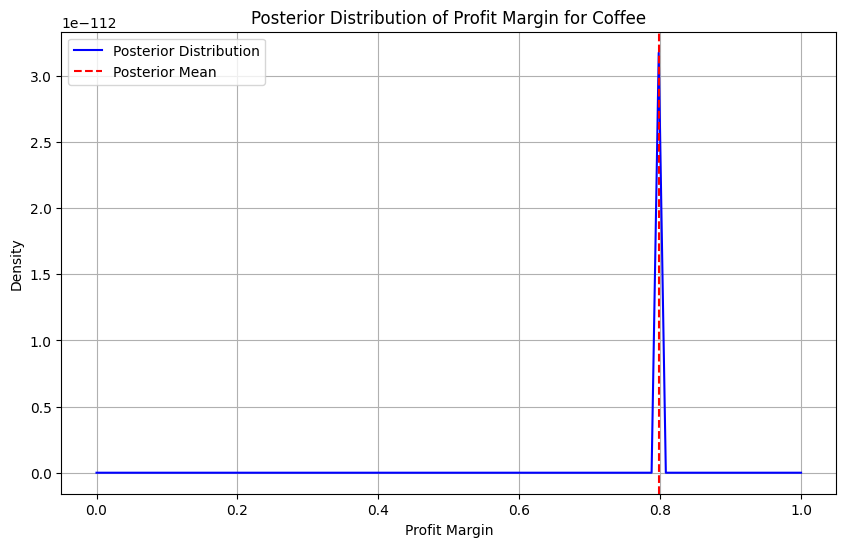

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the range for profit margin values
x = np.linspace(0, 1, 100)

# Calculate the posterior distribution
posterior_distribution = stats.norm.pdf(x, loc=0.7989, scale=3.99e-05)

# Plot the posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_distribution, label='Posterior Distribution', color='blue')
plt.axvline(0.7989, color='red', linestyle='--', label='Posterior Mean')
plt.title('Posterior Distribution of Profit Margin for Coffee')
plt.xlabel('Profit Margin')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assume 'transaction_time' is in HH:MM:SS format in the dataset.
# We'll first convert it to a datetime object and extract hours, minutes, etc.

# Example: 'transaction_time' is a string in the format 'HH:MM:SS'
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

# Extracting time features
df['transaction_hour'] = df['transaction_time'].dt.hour
df['transaction_minute'] = df['transaction_time'].dt.minute

# Filter relevant columns
X = df[['transaction_qty', 'wholesale_price', 'unit_price', 'transaction_hour']]  # using transaction_hour here
y = df['profit']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print summary statistics
print(model.summary())

# Make predictions
y_pred = model.predict(X_test)

# Calculate prediction intervals
predictions = model.get_prediction(X_test)
pred_int = predictions.conf_int()

# Now, apply similar steps to logistic regression if needed:
df['high_profit_margin'] = (df['profit_margin'] > 0.5).astype(int)

X_logit = df[['transaction_qty', 'wholesale_price', 'unit_price', 'transaction_hour']]  # using transaction_hour
y_logit = df['high_profit_margin']

# Add a constant for the logistic regression model
X_logit = sm.add_constant(X_logit)

# Split into train and test sets for logistic regression
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(X_logit, y_logit, test_size=0.2, random_state=42)

# Fit the logistic regression model
logit_model = sm.Logit(y_train_logit, X_train_logit).fit()

# Print summary statistics
print(logit_model.summary())

# Predict probabilities on the test set
y_pred_logit = logit_model.predict(X_test_logit)

# Classify predictions (logistic)
y_pred_class = (y_pred_logit >= 0.5).astype(int)

# Calculate prediction intervals for logistic regression
pred_logit = logit_model.get_prediction(X_test_logit)
pred_logit_int = pred_logit.conf_int()

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 2.418e+05
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:28:25   Log-Likelihood:            -1.1384e+05
No. Observations:              119292   AIC:                         2.277e+05
Df Residuals:                  119287   BIC:                         2.277e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.5901      0.008  

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:     high_profit_margin   No. Observations:               119292
Model:                          Logit   Df Residuals:                   119287
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        02:28:27   Log-Likelihood:            -9.0709e-05
converged:                      False   LL-Null:                       -67275.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.2936   1.37e+04      0.003      0.998   -2.68e+04    2.69e+04
transaction_qty    -19.9626   3612.218     -0.006      0.996   -7099.780    7059.855
wholesale_price   -177.0504 

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:239: RuntimeWarning: overflow encountered in exp
  t = np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:240: RuntimeWarning: overflow encountered in square
  return t / (1 + t) ** 2
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:240: RuntimeWarning: invalid value encountered in divide
  return t / (1 + t) ** 2
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


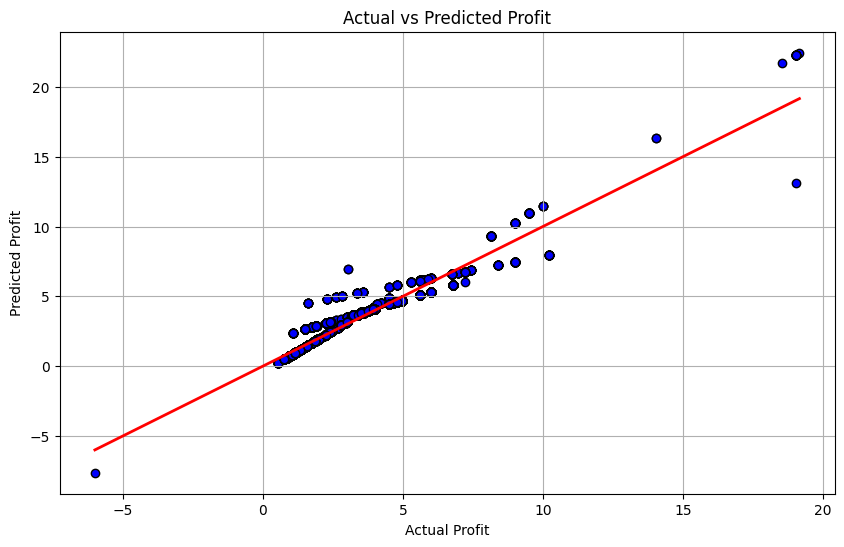

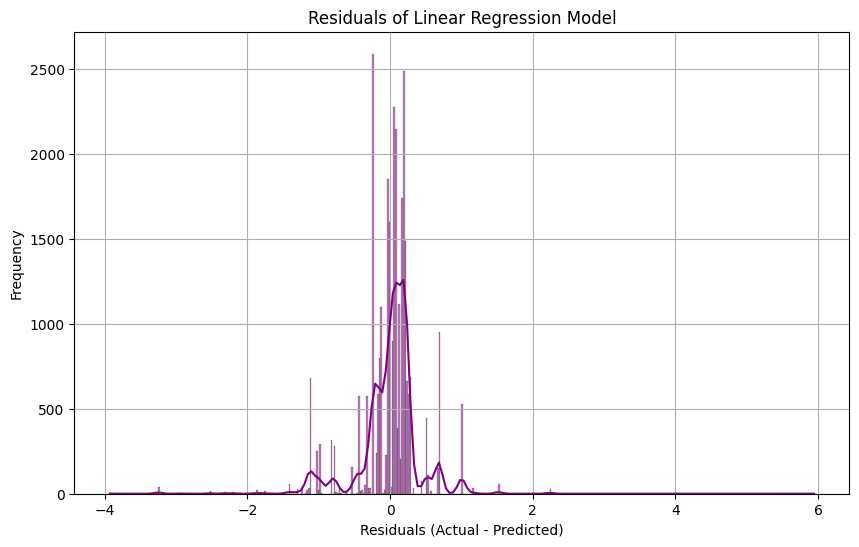

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted profit values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.grid(True)
plt.show()

# Plot residuals (errors between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

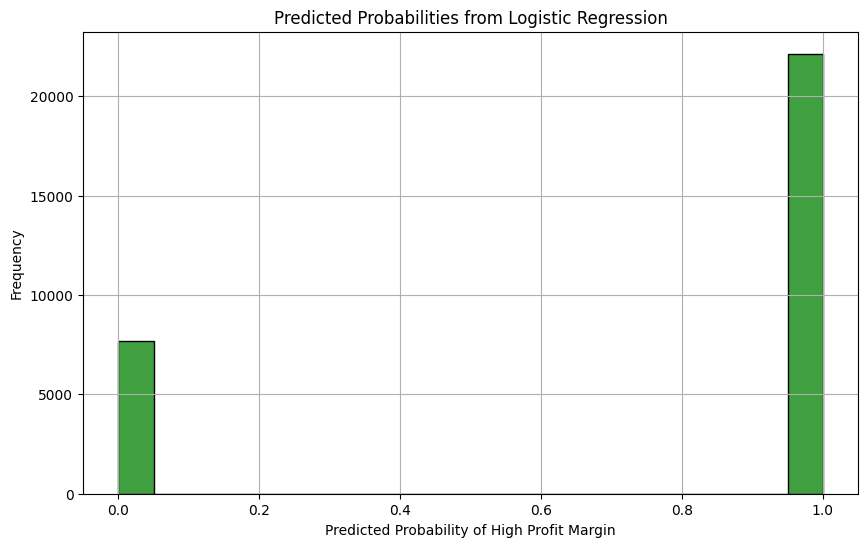

In [31]:
# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_logit, kde=False, bins=20, color='green')
plt.title('Predicted Probabilities from Logistic Regression')
plt.xlabel('Predicted Probability of High Profit Margin')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

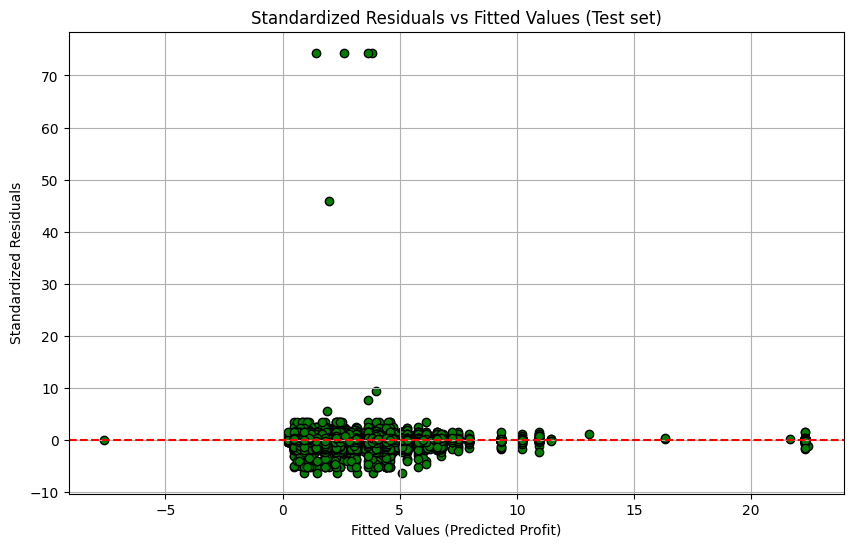

In [38]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Make predictions for the test set
fitted_values_test = model.predict(X_test)

# Get the influence for the entire dataset (model is fitted on training data)
influence = model.get_influence()

# Instead of using X_test.index, generate a sequence of indices based on the size of X_test
test_index = np.arange(len(X_test))

# Now use this new index to access standardized residuals for the test set
standardized_residuals_test = influence.resid_studentized_internal[test_index]

# Plot: Standardized Residuals vs Fitted Values (Test set)
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values_test, standardized_residuals_test, color='green', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Standardized Residuals vs Fitted Values (Test set)')
plt.xlabel('Fitted Values (Predicted Profit)')
plt.ylabel('Standardized Residuals')
plt.grid(True)
plt.show()

In [43]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define the negative log-likelihood function
def negative_log_likelihood(params, X, y):
    beta_0 = params[0]  # Intercept
    beta_1 = params[1]  # Coefficient for transaction_qty
    beta_2 = params[2]  # Coefficient for wholesale_price
    beta_3 = params[3]  # Coefficient for unit_price
    sigma = params[4]   # Standard deviation of the residuals

    # Linear prediction
    y_pred = beta_0 + beta_1 * X['transaction_qty'] + beta_2 * X['wholesale_price'] + beta_3 * X['unit_price']

    # Log-likelihood for normal distribution
    log_likelihood = -np.sum(np.log(1 / (np.sqrt(2 * np.pi) * sigma)) - ((y - y_pred) ** 2) / (2 * sigma ** 2))

    # Return negative log-likelihood (because we minimize, not maximize)
    return log_likelihood

# Relevant columns: transaction_qty, wholesale_price, unit_price, profit
# X: Independent variables; y: Dependent variable (profit)

X = df[['transaction_qty', 'wholesale_price', 'unit_price']]
y = df['profit']

# Initial guesses for the parameters (beta_0, beta_1, beta_2, beta_3, sigma)
initial_params = [0, 0, 0, 0, 1]  # Starting with 0 for coefficients and 1 for sigma

# Minimize the negative log-likelihood
result = minimize(negative_log_likelihood, initial_params, args=(X, y), method='L-BFGS-B')

# Extract the optimal parameters
beta_0_mle, beta_1_mle, beta_2_mle, beta_3_mle, sigma_mle = result.x

# Print the estimated parameters
print("Intercept (beta_0):", beta_0_mle)
print("Coefficient for transaction_qty (beta_1):", beta_1_mle)
print("Coefficient for wholesale_price (beta_2):", beta_2_mle)
print("Coefficient for unit_price (beta_3):", beta_3_mle)
print("Estimated sigma (standard deviation of residuals):", sigma_mle)

Intercept (beta_0): -2.537210897654211
Coefficient for transaction_qty (beta_1): 2.1372273472867893
Coefficient for wholesale_price (beta_2): -1.2010718101170157
Coefficient for unit_price (beta_3): 1.1920067433530521
Estimated sigma (standard deviation of residuals): 0.5934022728319327


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
I know I get in the shower and
# Convert 'transaction_time' to a usable format if necessary
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

# Create a binary target variable: profitable transaction (profit_margin > 0.5)
df['profitable'] = (df['profit_margin'] > 0.5).astype(int)

# Select features and target variable
X = df[['transaction_qty', 'wholesale_price', 'unit_price', 'transaction_hour']]
y = df['profitable']

# Encode categorical features if any (e.g., store_location)
# Assuming store_location is categorical
label_encoder = LabelEncoder()
df['store_location_encoded'] = label_encoder.fit_transform(df['store_location'])

# You can include encoded categorical features in X
X = df[['transaction_qty', 'wholesale_price', 'unit_price', 'transaction_hour', 'store_location_encoded']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9857162017167382
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      7689
           1       0.99      0.99      0.99     22135

    accuracy                           0.99     29824
   macro avg       0.98      0.98      0.98     29824
weighted avg       0.99      0.99      0.99     29824



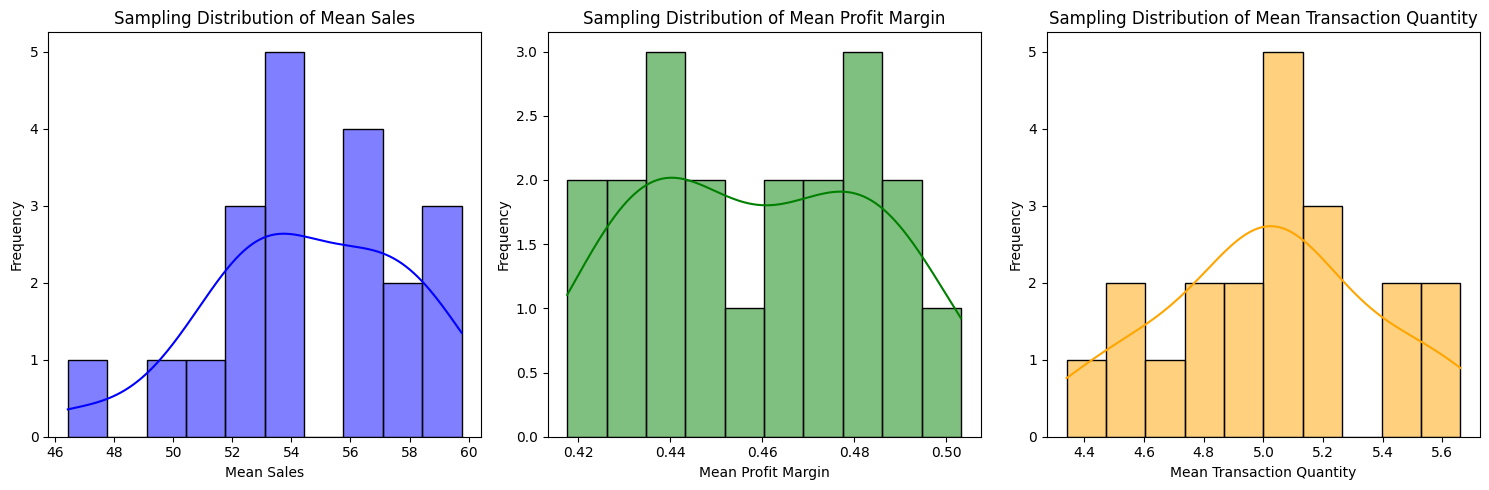

95% Confidence Interval for Mean Sales: (53.1057808623281, 56.00970464178218)
95% Confidence Interval for Mean Profit Margin: (0.44783030414886255, 0.4698127800201814)
95% Confidence Interval for Mean Transaction Quantity: (4.865606362843826, 5.1723936371561745)


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the provided data categories.
# For demonstration, we'll create a sample DataFrame (you should replace this with your actual data)
data = {
    'transaction_id': range(1, 101),
    'transaction_date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'transaction_qty': np.random.randint(1, 10, 100),
    'wholesale_price': np.random.uniform(1, 5, 100),
    'unit_price': np.random.uniform(3, 10, 100),
    'sales': np.random.uniform(10, 100, 100),
    'profit': np.random.uniform(5, 50, 100),
    'profit_margin': np.random.uniform(0.1, 0.8, 100)
}
df = pd.DataFrame(data)

# Step 1: Define key metrics to analyze
def calculate_metrics(sample):
    mean_sales = sample['sales'].mean()
    mean_profit_margin = sample['profit_margin'].mean()
    mean_transaction_qty = sample['transaction_qty'].mean()
    return mean_sales, mean_profit_margin, mean_transaction_qty

# Step 2: Collect samples
sample_means_sales = []
sample_means_profit_margin = []
sample_means_transaction_qty = []

# Sample size and number of samples
sample_size = 50
num_samples = 20

for _ in range(num_samples):
    sample = df.sample(n=sample_size, replace=True)
    mean_sales, mean_profit_margin, mean_transaction_qty = calculate_metrics(sample)
    sample_means_sales.append(mean_sales)
    sample_means_profit_margin.append(mean_profit_margin)
    sample_means_transaction_qty.append(mean_transaction_qty)

# Step 4: Construct sampling distributions
# Plotting the sampling distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(sample_means_sales, kde=True, color='blue', bins=10)
plt.title('Sampling Distribution of Mean Sales')
plt.xlabel('Mean Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(sample_means_profit_margin, kde=True, color='green', bins=10)
plt.title('Sampling Distribution of Mean Profit Margin')
plt.xlabel('Mean Profit Margin')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(sample_means_transaction_qty, kde=True, color='orange', bins=10)
plt.title('Sampling Distribution of Mean Transaction Quantity')
plt.xlabel('Mean Transaction Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 5: Analyze variability and confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = np.std(data) / np.sqrt(len(data))  # Standard Error of the Mean
    margin_of_error = sem * 1.96  # Z-score for 95% CI
    return mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals
ci_sales = calculate_confidence_interval(sample_means_sales)
ci_profit_margin = calculate_confidence_interval(sample_means_profit_margin)
ci_transaction_qty = calculate_confidence_interval(sample_means_transaction_qty)

# Print confidence intervals
print(f"95% Confidence Interval for Mean Sales: {ci_sales}")
print(f"95% Confidence Interval for Mean Profit Margin: {ci_profit_margin}")
print(f"95% Confidence Interval for Mean Transaction Quantity: {ci_transaction_qty}")

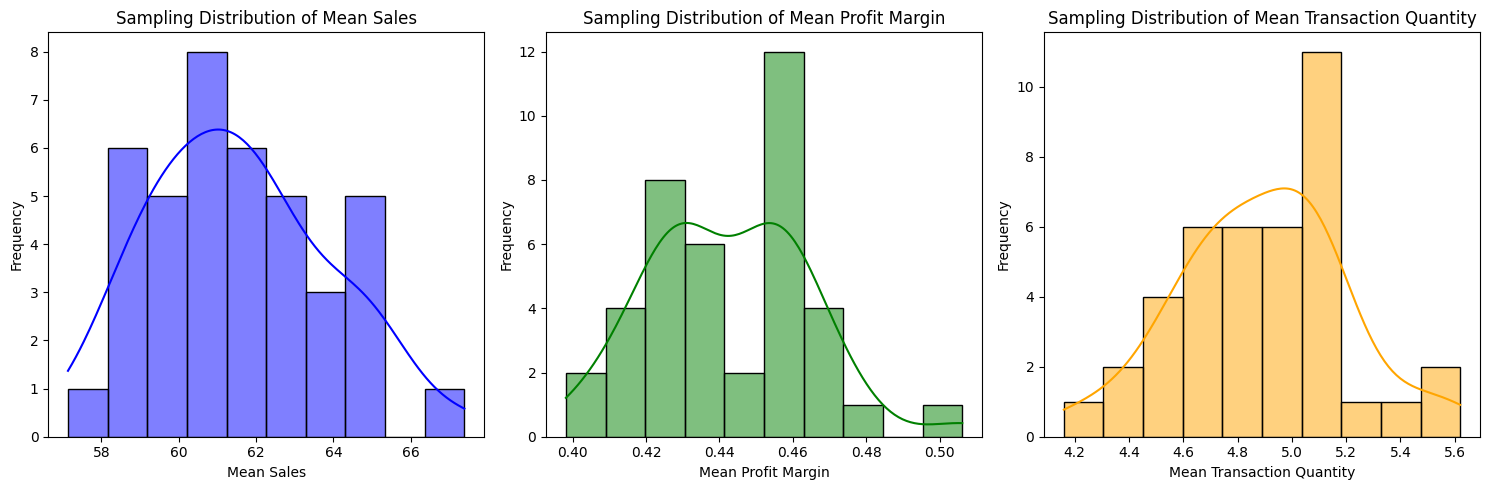

95% Confidence Interval for Mean Sales: (60.84902610403862, 62.26963026974297)
95% Confidence Interval for Mean Profit Margin: (0.4359266552102236, 0.4492283784256729)
95% Confidence Interval for Mean Transaction Quantity: (4.797163737036069, 4.985836262963932)


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the provided data categories.
# For demonstration, we'll create a sample DataFrame (you should replace this with your actual data)
data = {
    'transaction_id': range(1, 101),
    'transaction_date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'transaction_qty': np.random.randint(1, 10, 100),
    'wholesale_price': np.random.uniform(1, 5, 100),
    'unit_price': np.random.uniform(3, 10, 100),
    'sales': np.random.uniform(10, 100, 100),
    'profit': np.random.uniform(5, 50, 100),
    'profit_margin': np.random.uniform(0.1, 0.8, 100)
}
df = pd.DataFrame(data)

# Step 1: Define key metrics to analyze
def calculate_metrics(sample):
    mean_sales = sample['sales'].mean()
    mean_profit_margin = sample['profit_margin'].mean()
    mean_transaction_qty = sample['transaction_qty'].mean()
    return mean_sales, mean_profit_margin, mean_transaction_qty

# Step 2: Collect samples
sample_means_sales = []
sample_means_profit_margin = []
sample_means_transaction_qty = []

# Sample size and number of samples
sample_size = 100
num_samples = 40

for _ in range(num_samples):
    sample = df.sample(n=sample_size, replace=True)
    mean_sales, mean_profit_margin, mean_transaction_qty = calculate_metrics(sample)
    sample_means_sales.append(mean_sales)
    sample_means_profit_margin.append(mean_profit_margin)
    sample_means_transaction_qty.append(mean_transaction_qty)

# Step 4: Construct sampling distributions
# Plotting the sampling distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(sample_means_sales, kde=True, color='blue', bins=10)
plt.title('Sampling Distribution of Mean Sales')
plt.xlabel('Mean Sales')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(sample_means_profit_margin, kde=True, color='green', bins=10)
plt.title('Sampling Distribution of Mean Profit Margin')
plt.xlabel('Mean Profit Margin')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(sample_means_transaction_qty, kde=True, color='orange', bins=10)
plt.title('Sampling Distribution of Mean Transaction Quantity')
plt.xlabel('Mean Transaction Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 5: Analyze variability and confidence intervals
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = np.std(data) / np.sqrt(len(data))  # Standard Error of the Mean
    margin_of_error = sem * 1.96  # Z-score for 95% CI
    return mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals
ci_sales = calculate_confidence_interval(sample_means_sales)
ci_profit_margin = calculate_confidence_interval(sample_means_profit_margin)
ci_transaction_qty = calculate_confidence_interval(sample_means_transaction_qty)

# Print confidence intervals
print(f"95% Confidence Interval for Mean Sales: {ci_sales}")
print(f"95% Confidence Interval for Mean Profit Margin: {ci_profit_margin}")
print(f"95% Confidence Interval for Mean Transaction Quantity: {ci_transaction_qty}")

In [55]:
# Profit_margin column dividing profit by sales

# Calculate profit_margin:
df['profit_margin'] = df['profit'] / df['sales']

In [56]:
import pandas as pd

# Convert 'transaction_date' to datetime format if necessary
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Define key metrics

total_sales = df['sales'].sum()

mean_sales = df['sales'].mean()

total_profit = df['profit'].sum()

mean_profit_margin = df['profit_margin'].mean()

total_qty_sold = df['transaction_qty'].sum()

mean_transaction_qty = df['transaction_qty'].mean()

total_transactions = df['transaction_id'].nunique()

average_wholesale_price = df['wholesale_price'].mean()

average_unit_price = df['unit_price'].mean()

sales_by_day = df.groupby('day_of_week')['sales'].sum()

average_sales_by_month = df.groupby('month')['sales'].mean()

profit_margin_distribution = df['profit_margin'].describe()

sales_distribution = df['sales'].describe()

# Print the calculated metrics
print("Total Sales: ", total_sales)
print("Mean Sales: ", mean_sales)
print("Total Profit: ", total_profit)
print("Mean Profit Margin: ", mean_profit_margin)
print("Total Quantity Sold: ", total_qty_sold)
print("Mean Transaction Quantity: ", mean_transaction_qty)
print("Total Transactions: ", total_transactions)
print("Average Wholesale Price: ", average_wholesale_price)
print("Average Unit Price: ", average_unit_price)
print("Sales by Day of the Week:\n", sales_by_day)
print("Average Sales by Month:\n", average_sales_by_month)
print("Profit Margin Distribution:\n", profit_margin_distribution)
print("Sales Distribution:\n", sales_distribution)

Total Sales:  698812.3300000002
Mean Sales:  4.686367190643527
Total Profit:  438117.0299999999
Mean Profit Margin:  0.6649676339483738
Total Quantity Sold:  214470
Mean Transaction Quantity:  1.438276241315486
Total Transactions:  149116
Average Wholesale Price:  1.357325236728453
Average Unit Price:  3.382219413074385
Sales by Day of the Week:
 day_of_week
Friday       101373.00
Monday       101677.28
Saturday      96894.48
Sunday        98330.31
Thursday     100767.78
Tuesday       99455.94
Wednesday    100313.54
Name: sales, dtype: float64
Average Sales by Month:
 month
April       4.694734
February    4.654636
January     4.717439
June        4.709377
March       4.655645
May         4.674673
Name: sales, dtype: float64
Profit Margin Distribution:
 count    149116.000000
mean          0.664968
std           0.216056
min          -0.500000
25%           0.397143
50%           0.750000
75%           0.800000
max           0.950000
Name: profit_margin, dtype: float64
Sales Distributi

In [59]:
import pandas as pd
# 'transaction_qty', 'unit_price', 'wholesale_price', 'profit_margin', 'sales'

# Calculate Total Revenue (Sales) and Total Costs
df['total_cost'] = df['wholesale_price'] * df['transaction_qty']
df['total_revenue'] = df['sales']
df['profit'] = df['total_revenue'] - df['total_cost']

# 1. Total Expected Profit
total_expected_profit = df['profit'].sum()

# 2. Expected Profit per Transaction
expected_profit_per_transaction = df['profit'].mean()

# 3. Total Expected Loss (if any, considering negative profits)
total_expected_loss = df[df['profit'] < 0]['profit'].sum()

# 4. Expected Profit Margin
expected_profit_margin = df['profit_margin'].mean()

# 5. Expected Profit by Product
expected_profit_by_product = df.groupby('product')['profit'].sum()

# 6. Expected Profit by Product Category
expected_profit_by_category = df.groupby('product_category')['profit'].sum()

# Print Results
print("Total Expected Profit: ", total_expected_profit)
print("Expected Profit per Transaction: ", expected_profit_per_transaction)
print("Total Expected Loss: ", total_expected_loss)
print("Expected Profit Margin: ", expected_profit_margin)
print("\nExpected Profit by Product:\n", expected_profit_by_product)
print("\nExpected Profit by Product Category:\n", expected_profit_by_category)


Total Expected Profit:  438117.0299999999
Expected Profit per Transaction:  2.93809537541243
Total Expected Loss:  -42.0
Expected Profit Margin:  0.6649676339483738

Expected Profit by Product:
 product
Almond Croissant                 2505.29
Brazilian - Organic               770.40
Brazilian Lg                    12087.60
Brazilian Rg                    10524.00
Brazilian Sm                     7585.60
                                  ...   
Sustainably Grown Organic Lg     5299.07
Sustainably Grown Organic Rg     4069.26
Traditional Blend Chai            273.87
Traditional Blend Chai Lg        9391.50
Traditional Blend Chai Rg        8437.44
Name: profit, Length: 80, dtype: float64

Expected Profit by Product Category:
 product_category
Bakery                 28692.09
Branded                 9294.04
Coffee                215785.20
Coffee beans            8035.05
Drinking Chocolate     18082.58
Flavours                7988.36
Loose Tea               2242.72
Packaged Chocolate       

In [60]:
import pandas as pd

# Load your dataset into df
# df = pd.read_csv('your_file.csv')  # Uncomment and update with your file path

# Convert 'transaction_date' to datetime if not already done
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# 1. Calculate Sales by Month
monthly_sales = df.groupby(df['transaction_date'].dt.to_period('M'))['sales'].sum()

# 2. Calculate Sales by Day of the Week
weekly_sales = df.groupby('day_of_week')['sales'].sum()

# 3. Calculate Profit Margin Trends
profit_margin_trend = df.groupby(df['transaction_date'].dt.to_period('M'))['profit_margin'].mean()

# 4. Analyze Transaction Quantity Variability
transaction_qty_variability = df['transaction_qty'].describe()

# 5. Calculate Average Wholesale Price Fluctuations
average_wholesale_price = df['wholesale_price'].mean()

# Print the results
print("Monthly Sales:\n", monthly_sales)
print("\nWeekly Sales:\n", weekly_sales)
print("\nProfit Margin Trend:\n", profit_margin_trend)
print("\nTransaction Quantity Variability:\n", transaction_qty_variability)
print("\nAverage Wholesale Price: ", average_wholesale_price)

# 6. Risk Matrix Example
def risk_assessment(likelihood, impact):
    if likelihood == "high" and impact == "high":
        return "High Risk"
    elif likelihood == "medium" and impact == "medium":
        return "Medium Risk"
    else:
        return "Low Risk"

# Example usage of risk assessment
risk_level = risk_assessment("high", "medium")  # Modify based on your risk analysis
print("\nRisk Level Assessment: ", risk_level)


Monthly Sales:
 transaction_date
2023-01     81677.74
2023-02     76145.19
2023-03     98834.68
2023-04    118941.08
2023-05    156727.76
2023-06    166485.88
Freq: M, Name: sales, dtype: float64

Weekly Sales:
 day_of_week
0    101677.28
1     99455.94
2    100313.54
3    100767.78
4    101373.00
5     96894.48
6     98330.31
Name: sales, dtype: float64

Profit Margin Trend:
 transaction_date
2023-01    0.664268
2023-02    0.663050
2023-03    0.664086
2023-04    0.664981
2023-05    0.665147
2023-06    0.666548
Freq: M, Name: profit_margin, dtype: float64

Transaction Quantity Variability:
 count    149116.000000
mean          1.438276
std           0.542509
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: transaction_qty, dtype: float64

Average Wholesale Price:  1.357325236728453

Risk Level Assessment:  Low Risk
